# Video Game Sales Analysis

## 1. Import & Setup
Set up the environment and import necessary Python libraries like Pandas, NumPy, Matplotlib, Seaborn, and Plotly for analysis and visualization.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Configure Seaborn and Matplotlib aesthetics
sns.set_theme(style="whitegrid", context="notebook", palette="crest")

# Matplotlib defaults for clarity
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["xtick.labelsize"] = 10
plt.rcParams["ytick.labelsize"] = 10

## 2. Data Overview
Perform a first look at the dataset to understand its structure, size, and key columns.
- Used `data.info()` and `data.describe()` to check column types and summary statistics.
- Found 16 columns and over 16,000 records.
- Observed several missing values, especially in review-related fields (`Critic_Score`, `User_Score`, etc.).
- Confirmed no duplicate rows.
- Identified data type issues: `Year_of_Release` stored as float, `User_Score` stored as object.

In [3]:
# Read the CSV file
csv_path = "../data/Video_Games_Sales_as_at_22_Dec_2016.csv"  # adjust if name differs
df = pd.read_csv(csv_path)

# Convert to Parquet for faster reads later
parquet_path = "../data/video_games_sales.parquet"
df.to_parquet(parquet_path, index=False)

# Confirm conversion worked
print("Parquet file saved successfully!")

Parquet file saved successfully!


In [4]:
# Checking the head of the data NB: I prefer paraquet cause it's faster.
data = pd.read_parquet(parquet_path)
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Display shape (rows, columns)
print("Dataset shape:", data.shape)

# Quick summary of dataset info
print("\nQuick Facts about Dataset")
data.info()

# Check for missing values
print("\nMissing values per column:")
print(data.isna().sum())

# View column data types
print("\nData types:")
print(data.dtypes)

# Summary statistics for numeric columns
display(data.describe())

# Check unique counts for categorical columns (quick view)
print("\n")
cat_cols = data.select_dtypes(include='object').columns
for col in cat_cols:
    unique_count = data[col].nunique()
    print(f"{col}: {unique_count} unique values")

# Quick look at duplicate rows
print("\nDuplicate rows:", data.duplicated().sum())

Dataset shape: (16719, 16)

Quick Facts about Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: f

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000




Name: 11562 unique values
Platform: 31 unique values
Genre: 12 unique values
Publisher: 581 unique values
User_Score: 96 unique values
Developer: 1696 unique values
Rating: 8 unique values

Duplicate rows: 0


### 2.1 Data Overview Summary

- Rows and columns: 16,719 rows, 16 columns. Medium dataset.
- Core columns: Name, Platform, Year_of_Release, Genre, Publisher, regional sales, review scores, developer, rating.
- Missing data:
  - Small: Name (2), Genre (2), Year_of_Release (269), Publisher (54).
  - Large: Critic_Score (8,582), Critic_Count (8,582), User_Score (6,704), User_Count (9,129), Developer (6,623), Rating (6,769).
  - Conclusion: review-related columns are incomplete, so we should not drop all those rows.
- Data types:
  - Year_of_Release is float, should be integer.
  - User_Score is object, should be numeric, likely because of values like "tbd".
- No duplicate rows.
- Categorical richness: 31 platforms, 12 genres, 581 publishers, so we can group and aggregate later.
- Sales columns have no missing values, so analysis by sales is safe.

Next step (Cleaning & Fixes):
1. Fix dtypes (Year_of_Release → int, User_Score → numeric after handling "tbd").
2. Fill text columns with “Unknown” (Publisher, Developer, Rating).
3. Decide what to do with review columns (keep separate subset for score-based analysis).
4. Drop the 2–3 completely bad rows if needed.

## 3. Cleaning & Fixes
Steps taken to clean the dataset:
1. **Converted data types** – Fixed `Year_of_Release` (to Int64) and converted `User_Score` to numeric after replacing `'tbd'` with `NaN`.
2. **Handled missing values** – Filled missing categorical values (`Publisher`, `Developer`, `Rating`) with `'Unknown'`.
3. **Dropped incomplete rows** – Removed rows missing critical identifiers (`Name`, `Genre`, or `Year_of_Release`).
4. **Removed invalid records** – Excluded future release years (after 2016).
5. **Reset index** – To maintain sequential order after row drops.


After cleaning:
- All key descriptive columns are complete.
- Remaining missing values only affect optional review columns.
- Data types are now correct for all columns.


---

In [17]:
# 0. Normalize categorical columns for consistent grouping
for col in ['Platform', 'Genre', 'Publisher', 'Developer', 'Rating']:
    data[col] = data[col].astype(str).str.strip().str.upper()

# 1. fix user score
data['User_Score'] = data['User_Score'].replace('tbd', np.nan)
data['User_Score'] = pd.to_numeric(data['User_Score'], errors='coerce')

# 2. fill text columns
for col in ['Publisher', 'Developer', 'Rating']:
    data[col] = data[col].fillna('Unknown')

# 3. drop rows that miss key info
data = data.dropna(subset=['Name', 'Genre', 'Year_of_Release'])

# 4. make year integer
data['Year_of_Release'] = data['Year_of_Release'].astype('Int64')

# 5. remove future years
data = data[data['Year_of_Release'] <= 2016]

# 6. reset index
data = data.reset_index(drop=True)

# 7. Checking the Quick Fact about Data again after cleaning
data.info()

# 8. Verify categorical consistency after cleaning
categorical_cols = ['Platform', 'Genre', 'Publisher', 'Developer', 'Rating']

print("\nChecking categorical column consistency:\n")
for col in categorical_cols:
    unique_vals = data[col].unique()
    print(f"Column: {col}")
    print(f"  Unique values: {len(unique_vals)}")
    print(f"  Sample values: {unique_vals[:10]}")  # show only first 10 for readability
    print(f"  Any 'UNKNOWN' present? {'UNKNOWN' in unique_vals}")
    print(f"  Any lowercase variants? {any(v != v.upper() for v in unique_vals)}")
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16444 non-null  object 
 1   Platform         16444 non-null  object 
 2   Year_of_Release  16444 non-null  Int64  
 3   Genre            16444 non-null  object 
 4   Publisher        16444 non-null  object 
 5   NA_Sales         16444 non-null  float64
 6   EU_Sales         16444 non-null  float64
 7   JP_Sales         16444 non-null  float64
 8   Other_Sales      16444 non-null  float64
 9   Global_Sales     16444 non-null  float64
 10  Critic_Score     7983 non-null   float64
 11  Critic_Count     7983 non-null   float64
 12  User_Score       7463 non-null   float64
 13  User_Count       7463 non-null   float64
 14  Developer        16444 non-null  object 
 15  Rating           16444 non-null  object 
 16  game_age         16444 non-null  Int64  
 17  has_critic  

## 4. Feature Engineering

In this step, we create new derived features that add analytical value:

- **game_age** – The number of years since the game’s release (using 2016 as the reference year).  
- **has_critic** – Binary flag (1/0) showing whether a game has critic review data.  
- **has_user** – Binary flag (1/0) showing whether a game has user review data.  
- **regional_sum** – The total of regional sales (`NA`, `EU`, `JP`, and `Other`) to compare with `Global_Sales` for data consistency checks.

These engineered columns help us:
- Analyze trends in sales relative to game age.
- Filter datasets based on available review information.
- Verify whether global sales match the sum of regional sales.



In [7]:
# 1. game_age
CURRENT_YEAR = 2016  # dataset is up to 2016
data['game_age'] = CURRENT_YEAR - data['Year_of_Release']

# 2. review availability flags
data['has_critic'] = data['Critic_Score'].notna().astype(int)
data['has_user'] = data['User_Score'].notna().astype(int)

# 3. regional vs global check
data['regional_sum'] = (
    data['NA_Sales'] +
    data['EU_Sales'] +
    data['JP_Sales'] +
    data['Other_Sales']
)

# sometimes global is slightly different due to rounding, so we keep both
data[['Year_of_Release', 'game_age', 'has_critic', 'has_user']].head()

,Year_of_Release,game_age,has_critic,has_user
0,2006,10,1,1
1,1985,31,0,0
2,2008,8,1,1
3,2009,7,1,1
4,1996,20,0,0


## 5. Univariate Analysis

This section examines each major variable separately to understand the dataset’s overall structure and distribution patterns.

Key objectives:
- Identify the most common platforms, genres, and publishers.
- Visualize the distribution of global sales.
- Spot potential skews or outliers in numeric variables.

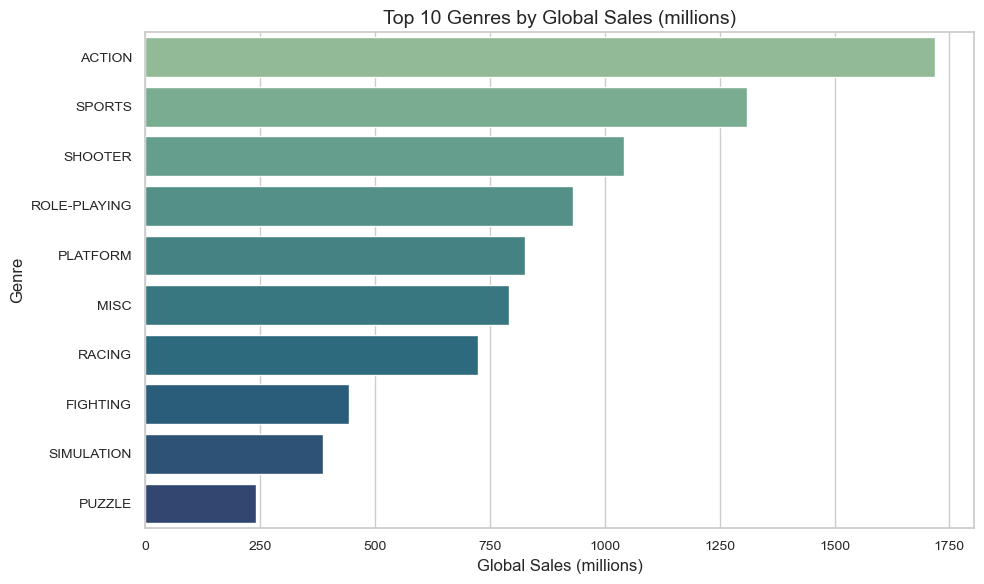

In [8]:
# --- 5.1 Top 10 Genres by Global Sales ---
genre_sales = (
    data.groupby("Genre")["Global_Sales"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

sns.barplot(x=genre_sales.values, y=genre_sales.index, hue=genre_sales.index, palette="crest")
plt.title("Top 10 Genres by Global Sales (millions)")
plt.xlabel("Global Sales (millions)")
plt.ylabel("Genre")
plt.tight_layout()

# Save figure to the figures folder
plt.savefig("../figures/top10_genres_sales.png", dpi=300)
plt.show()

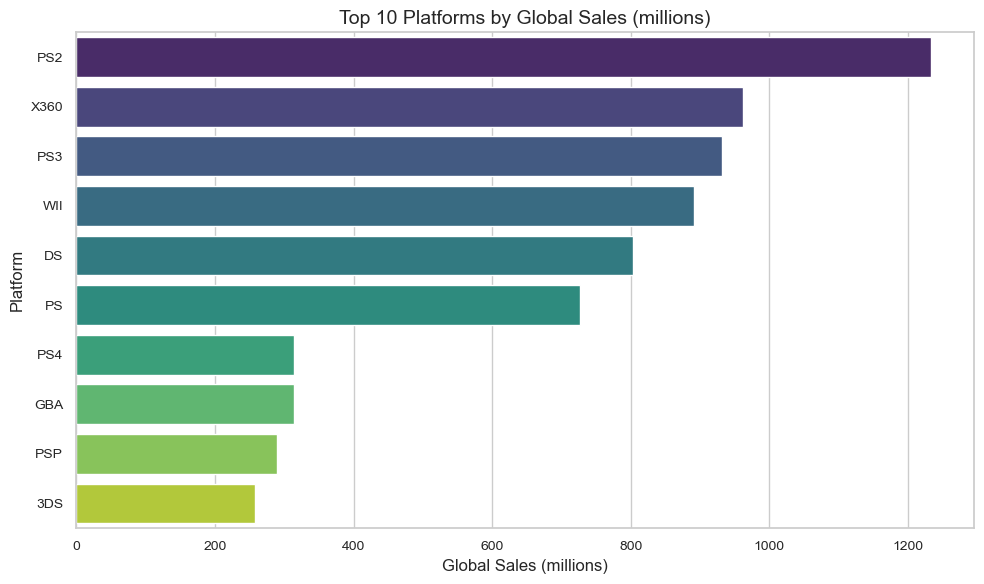

In [9]:
# --- 5.2 Top 10 Platforms by Global Sales ---

# 1. group by platform and sum sales
platform_sales = (
    data.groupby("Platform")["Global_Sales"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# 2. plot
sns.barplot(
    x=platform_sales.values,
    y=platform_sales.index,
    hue=platform_sales.index,
    palette="viridis",
    legend=False
)
plt.title("Top 10 Platforms by Global Sales (millions)")
plt.xlabel("Global Sales (millions)")
plt.ylabel("Platform")
plt.tight_layout()

# 3. save
plt.savefig("../figures/top10_platforms_sales.png", dpi=300)
plt.show()

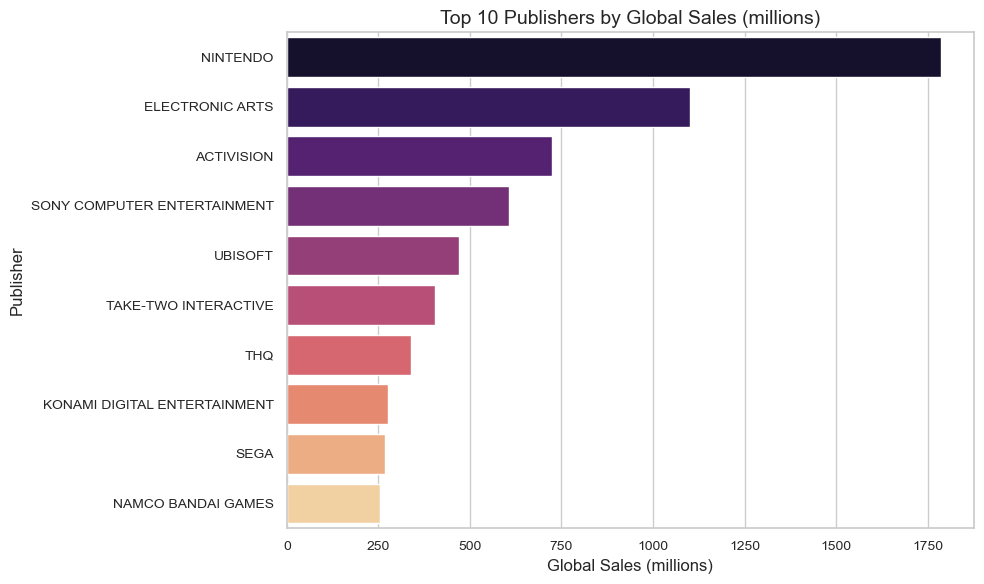

In [10]:
# --- 5.3 Top 10 Publishers by Global Sales ---

# 1. Aggregate total global sales by publisher
publisher_sales = (
    data.groupby("Publisher")["Global_Sales"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# 2. Plot
sns.barplot(
    x=publisher_sales.values,
    y=publisher_sales.index,
    hue=publisher_sales.index,
    palette="magma",
    legend=False
)
plt.title("Top 10 Publishers by Global Sales (millions)")
plt.xlabel("Global Sales (millions)")
plt.ylabel("Publisher")
plt.tight_layout()

# 3. Save figure
plt.savefig("../figures/top10_publishers_sales.png", dpi=300)
plt.show()

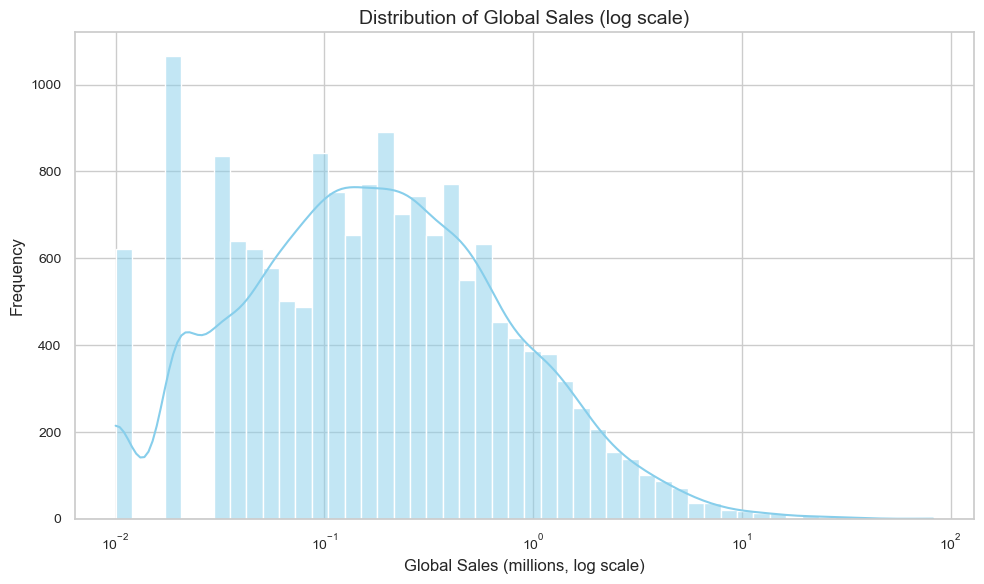

In [11]:
# --- 5.4 Global Sales Distribution (log scale) ---
sns.histplot(data["Global_Sales"], bins=50, kde=True, color="skyblue", log_scale=True)
plt.title("Distribution of Global Sales (log scale)")
plt.xlabel("Global Sales (millions, log scale)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("../figures/global_sales_distribution_log.png", dpi=300)
plt.show()


## 6. Bivariate Analysis
### 6.0 Overview

Bivariate analysis explores how two variables relate to each other.  
Here, we investigate how review scores, genres, and release years influence sales performance.  
This helps uncover patterns that single-variable (univariate) analysis cannot show — for example, whether higher-rated games sell more, or if certain genres dominate specific regions.

We'll cover:
1. Sales vs. Review Scores (Critic & User)
2. Regional Sales Patterns by Genre
3. Sales Trends Over Time


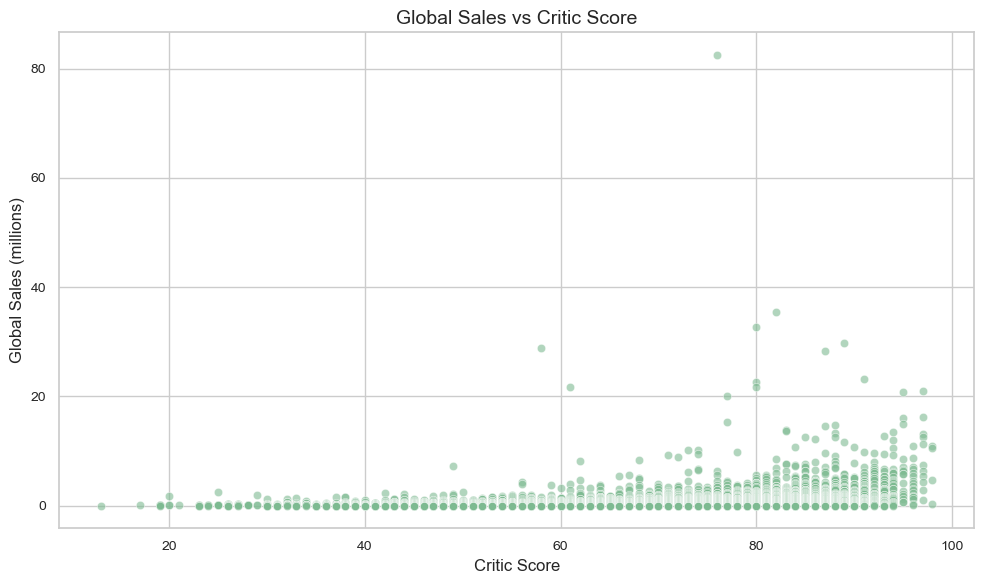

Correlation between Critic Score and Global Sales: 0.245


In [12]:
# 6.1 Global Sales vs Critic Score

# keep only rows that have BOTH critic score and sales
critic_df = data[data["Critic_Score"].notna()]

sns.scatterplot(
    data=critic_df,
    x="Critic_Score",
    y="Global_Sales",
    alpha=0.6
)
plt.title("Global Sales vs Critic Score")
plt.xlabel("Critic Score")
plt.ylabel("Global Sales (millions)")
plt.tight_layout()
plt.savefig("../figures/sales_vs_critic_score.png", dpi=300)
plt.show()

# quick correlation
critic_corr = critic_df["Critic_Score"].corr(critic_df["Global_Sales"])
print("Correlation between Critic Score and Global Sales:", round(critic_corr, 3))

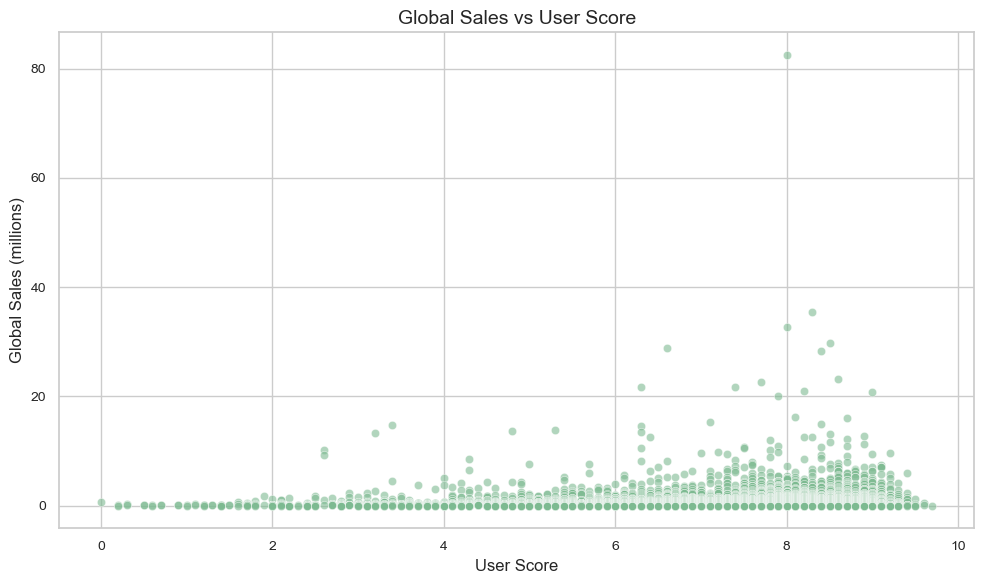

Correlation between User Score and Global Sales: 0.088


In [13]:
# 6.2 Global Sales vs User Score

user_df = data[data["User_Score"].notna()]

sns.scatterplot(
    data=user_df,
    x="User_Score",
    y="Global_Sales",
    alpha=0.6
)
plt.title("Global Sales vs User Score")
plt.xlabel("User Score")
plt.ylabel("Global Sales (millions)")
plt.tight_layout()
plt.savefig("../figures/sales_vs_user_score.png", dpi=300)
plt.show()

user_corr = user_df["User_Score"].corr(user_df["Global_Sales"])
print("Correlation between User Score and Global Sales:", round(user_corr, 3))

### 6.2.1 Interpretation: Sales vs Critic & User Scores

The scatterplots and correlations show weak relationships between review scores and global sales.  
Critic scores (r ≈ 0.25) have a mild positive influence, but user scores (r ≈ 0.09) are almost irrelevant to sales volumes.  
This suggests that strong marketing, franchise reputation, or platform exclusivity drive sales more than reviews do.

### 6.3 Regional Sales by Genre

This chart compares total video game sales by genre across three key markets:  
North America (NA), Europe (EU), and Japan (JP).  

It helps highlight regional differences in player preferences — for example, Western markets tend to prefer action or shooter games, while Japanese players often favor role-playing titles.

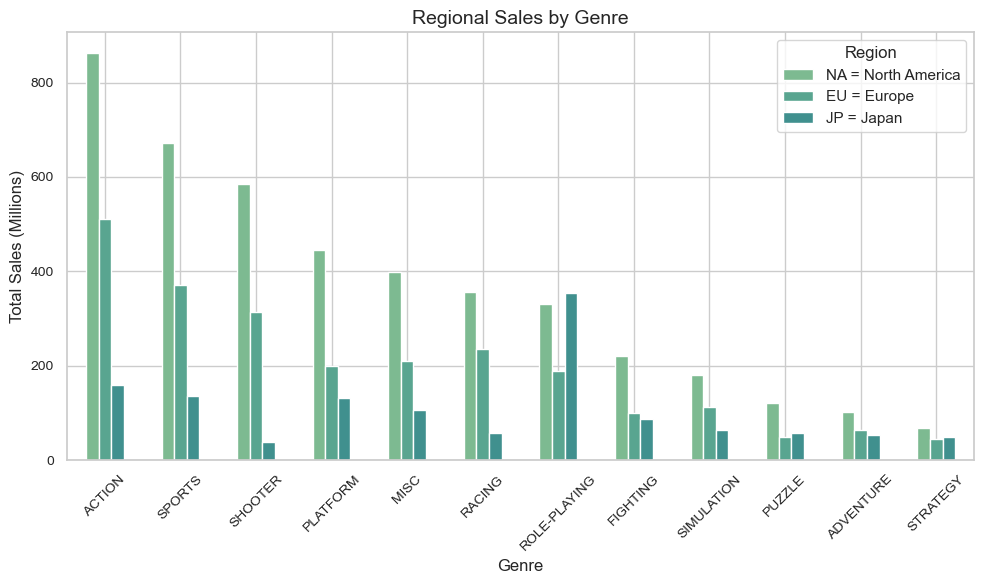

In [14]:
# Group by Genre and sum regional sales
region_sales = (
    data.groupby("Genre")[["NA_Sales", "EU_Sales", "JP_Sales"]]
    .sum()
    .sort_values("NA_Sales", ascending=False)
)

# Plot comparison
ax = region_sales.plot(kind="bar")
plt.title("Regional Sales by Genre")
plt.xlabel("Genre")
plt.ylabel("Total Sales (Millions)")
plt.xticks(rotation=45)
plt.legend(title="Region", labels=["NA = North America", "EU = Europe", "JP = Japan"])
plt.tight_layout()

# Save plot
plt.savefig("../figures/region_sales_by_genre.png")
plt.show()

### 6.3.1 Interpretation: Regional Sales by Genre

The chart highlights distinct regional preferences across gaming markets:

- **North America (NA)** and **Europe (EU)** show similar trends, with **Action**, **Shooter**, and **Sports** games dominating total sales.  
- **Japan (JP)** stands out, where **Role-Playing (RPG)** titles significantly outperform other genres, reflecting the country's cultural affinity for story-driven and character-based games.  
- The gap between NA/EU and JP sales volumes emphasizes how regional tastes and market sizes influence global success.  

Overall, Western markets favor fast-paced and competitive genres, while the Japanese market leans heavily toward narrative depth and RPG elements.

### 6.4 Sales Trends Over Time

Here, we examine how global video game sales evolved over the years.  
This helps reveal the industry's growth cycles, major peaks, and declines — especially during console generation shifts and the rise of digital downloads after 2015.

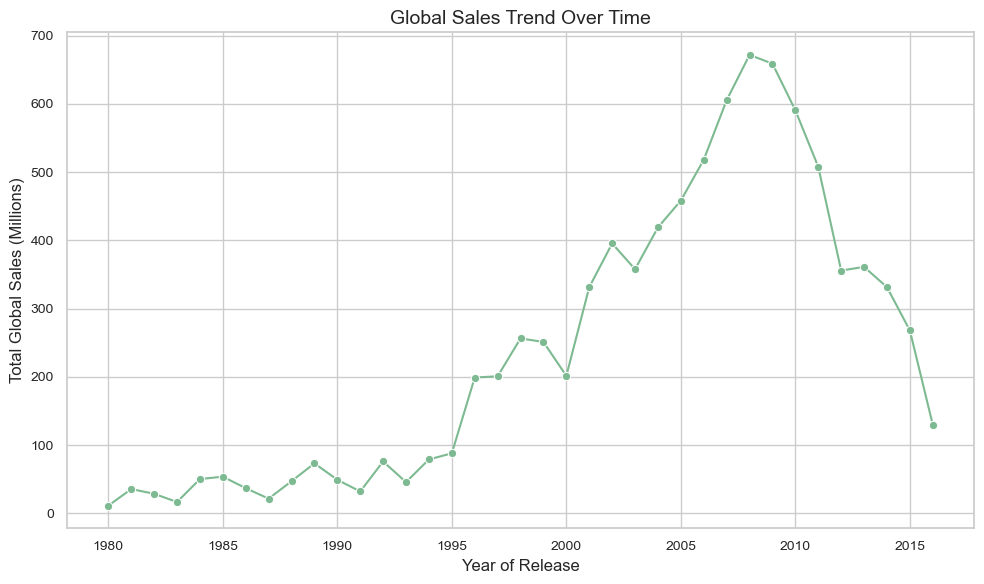

In [15]:
# Group by release year and sum global sales
yearly_sales = (
    data.groupby("Year_of_Release")["Global_Sales"]
    .sum()
    .reset_index()
    .sort_values("Year_of_Release")
)

# Plot trend over time
sns.lineplot(data=yearly_sales, x="Year_of_Release", y="Global_Sales", marker="o")
plt.title("Global Sales Trend Over Time")
plt.xlabel("Year of Release")
plt.ylabel("Total Global Sales (Millions)")
plt.grid(True)
plt.tight_layout()

# Save plot
plt.savefig("../figures/global_sales_trend_over_time.png")
plt.show()

### 6.4.1 Interpretation: Global Sales Trend Over Time

The trend shows a rapid rise in global video game sales from the early 2000s, peaking around **2008–2010**.  
This period aligns with the success of the **Wii**, **PlayStation 3**, and **Xbox 360** — a golden age for console gaming.

After 2011, total physical sales decline steadily, reflecting the industry's transition to **digital distribution**, **mobile gaming**, and **online platforms** that are not captured in this dataset.  
The pattern highlights both the market's cyclical nature and how evolving technology reshapes revenue distribution over time.

## 7. Summary & Conclusions

This Exploratory Data Analysis (EDA) examined over 16,000 video game records to uncover patterns in sales, ratings, and genre performance across global regions.  
The analysis followed a complete data-science workflow — cleaning, transformation, feature engineering, and visualization — to draw meaningful insights from a messy, real-world dataset.

### Key Findings

1. **Market Overview:**  
   Global sales are heavily skewed, with a few blockbuster titles accounting for most revenue.  
   The market peaked around **2008–2010**, reflecting the success of major consoles like the **Wii**, **PlayStation 3**, and **Xbox 360** before physical sales began declining with the shift to digital distribution.

2. **Genre Insights:**  
   - **Action**, **Shooter**, and **Sports** games dominate North American and European markets.  
   - **Role-Playing (RPG)** titles lead in Japan, highlighting strong regional preferences.  
   - The dominance of action-oriented genres reflects global demand for fast-paced, accessible gameplay.

3. **Sales vs. Ratings:**  
   - **Critic Scores** show a weak positive correlation with global sales (r ≈ 0.25).  
   - **User Scores** show almost no correlation (r ≈ 0.09).  
   - Strong marketing, franchise recognition, and platform exclusivity influence commercial success far more than reviews.

4. **Platform and Publisher Trends:**  
   The most successful platforms were **PS2**, **X360**, and **Wii**, while leading publishers such as **Nintendo**, **Electronic Arts**, and **Activision** drove much of the industry's revenue.

### Conclusions

The video game industry is cyclical, driven by hardware generations and cultural preferences.  
Critical acclaim supports visibility but does not guarantee high sales.  
Future analysis could integrate modern datasets including **digital sales** and **mobile platforms** to better reflect the post-2015 market shift.

This project demonstrates a full, professional EDA process — from data acquisition (via Kaggle API) to interpretation — following clear documentation, reproducible structure, and visualization best practices.